In [1]:
# Import libraries
import pandas as pd
import numpy as np

from models.DecisionTree import DecisionTree
from models.random_forest import RandomForestClassifier
from models.AdaBoostClassifer import AdaBoostClassifier
from models.LogisticRegression import LogisticRegression
from models.KNNClassifier import KNNClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Import the dataset
df = pd.read_csv('org_dataset.csv')
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

## Exploratory Data Analysis

In [3]:
df.shape

(12684, 26)

In [4]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
df.occupation.unique().shape

(25,)

Plot the grouped bar charts for each column - Count vs Label colored by Y

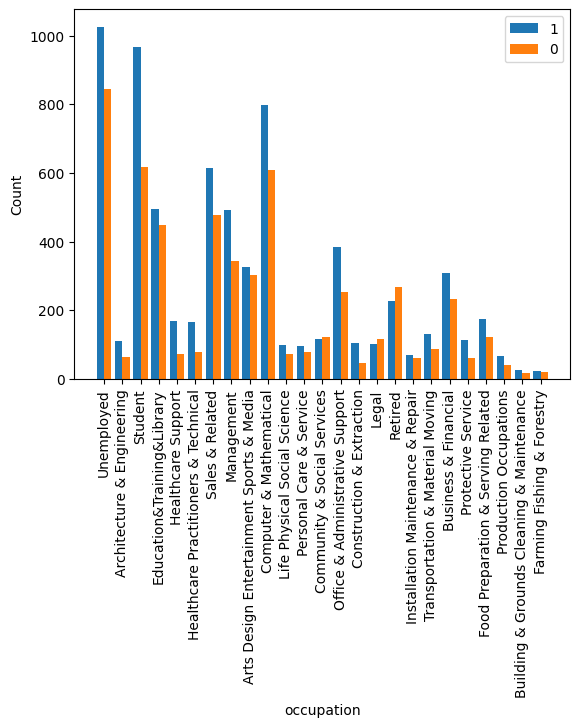

In [6]:
#education, occupation, income, car

import matplotlib.pyplot as plt
import numpy as np

column = 'occupation'

unique_values = df[column].unique()

x = np.arange(unique_values.shape[0])

y1 = [ df[(df['Y'] == 1) & (df[column] == v)].shape[0] for v in unique_values ]
y0 = [ df[(df['Y'] == 0) & (df[column] == v)].shape[0] for v in unique_values ]
width = 0.4

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y0, width)

plt.xticks(x, df[column].unique(), rotation=90)
plt.xlabel(column)
plt.ylabel('Count')

plt.legend([1, 0])
plt.show()

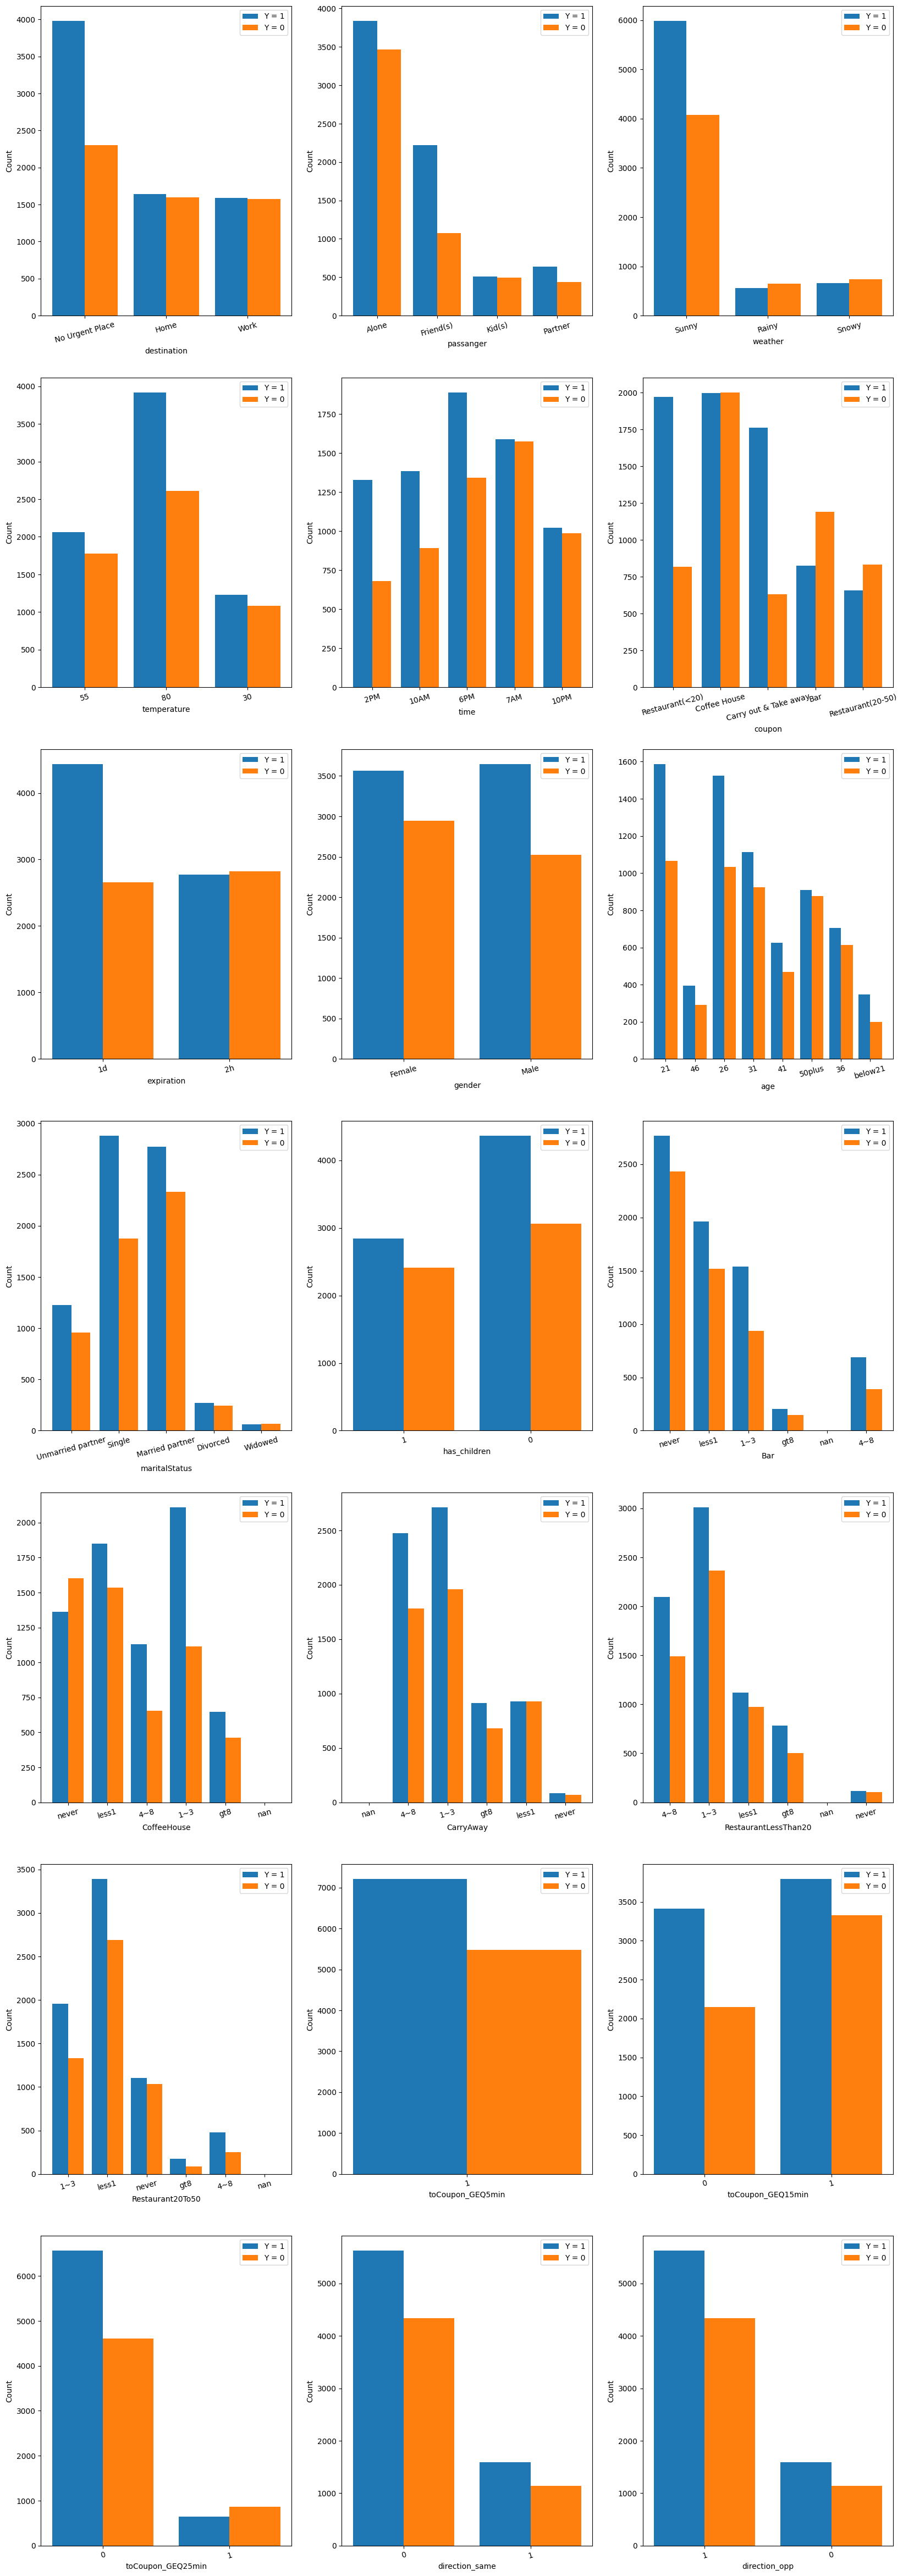

In [7]:
#fig, ax = plt.subplots(nrows=9, ncols=3, sharey=True, figsize=(20,60))
fig, ax = plt.subplots(nrows=7, ncols=3, sharey=False, figsize=(20,60))

columns = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

column_counter = 0

for row in ax:
    for col in row:
        if column_counter > 25:
            break

        c = columns[column_counter]

        unique_values = df[c].unique()

        x = np.arange(unique_values.shape[0])

        y1 = [ df[(df['Y'] == 1) & (df[c] == v)].shape[0] for v in unique_values ]
        y0 = [ df[(df['Y'] == 0) & (df[c] == v)].shape[0] for v in unique_values ]
        width = 0.4

        col.bar(x-0.2, y1, width)
        col.bar(x+0.2, y0, width)

        col.set_xticks(x, unique_values, rotation=15)
        col.set_xlabel(c)
        col.set_ylabel('Count')
        col.legend(['Y = 1', 'Y = 0'])

        column_counter += 1

plt.show()

Plot the cardinarities of each column

In [8]:
s = pd.Series([ df[c].unique().shape[0] for c in df.columns[:-1] ])
s

0      3
1      4
2      3
3      3
4      5
5      5
6      2
7      2
8      8
9      5
10     2
11     6
12    25
13     9
14     6
15     6
16     6
17     6
18     6
19     6
20     1
21     2
22     2
23     2
24     2
dtype: int64

In [9]:
s.index = df.columns[:-1]
s

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      6
Bar                      6
CoffeeHouse              6
CarryAway                6
RestaurantLessThan20     6
Restaurant20To50         6
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
dtype: int64

In [10]:
s.sort_values(ascending = False, inplace = True)

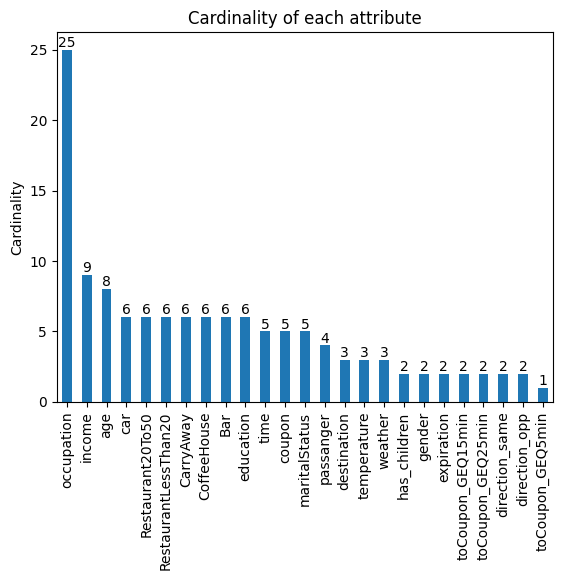

In [11]:
ax = s.plot.bar()
ax.set_ylabel('Cardinality')
ax.set_title('Cardinality of each attribute')

ax.bar_label(ax.containers[0]);

In [12]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## Data Pre-processing

Drop the 'car' feature.

In [3]:
df.drop(columns='car', inplace=True)

In [4]:
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

The features Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 still have missing values.

Build a decision tree without these features and predict the missing values using this model.

In [5]:
df_noNull = df[(df.Bar.notnull()) & (df.CoffeeHouse.notnull()) & (df.CarryAway.notnull()) & (df.RestaurantLessThan20.notnull()) & (df.Restaurant20To50.notnull())]
df_noNull.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [6]:
columns_imputation = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']

x_imputation = df_noNull[columns_imputation]

# Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50
y_Bar = df_noNull.Bar
y_CoffeeHouse = df_noNull.CoffeeHouse
y_CarryAway = df_noNull.CarryAway
y_RestaurantLessThan20 = df_noNull.RestaurantLessThan20
y_Restaurant20To50 = df_noNull.Restaurant20To50

In [7]:
y_arrays = [y_Bar, y_CoffeeHouse, y_CarryAway, y_RestaurantLessThan20, y_Restaurant20To50]
features_null = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
max_depths = [3, 5, 8, 10, 12]

train_accuracy = []
train_weighted_avg_precision = []
train_weighted_avg_recall = []
test_accuracy = []
test_weighted_avg_precision = []
test_weighted_avg_recall = []
n_max_depth = []
feature = []

for d in max_depths:
    for i, f in enumerate(features_null):
        n_max_depth.append(d)
        feature.append(f)

        x_train, x_test, y_train, y_test = train_test_split(x_imputation, y_arrays[i], test_size = 0.2, random_state=11)

        dt_model = DecisionTree(min_samples_split=3, max_depth=d, classifier=True, column_names=list(x_train.columns))
        dt_model.fit(x_train.to_numpy(), y_train.values.reshape(-1,1))

        y_hat = dt_model.predict(x_train.to_numpy())
        report = classification_report(y_train, y_hat, output_dict=True, zero_division=0)
        train_accuracy.append(report['accuracy'])
        train_weighted_avg_precision.append(report['weighted avg']['precision'])
        train_weighted_avg_recall.append(report['weighted avg']['recall'])

        y_hat = dt_model.predict(x_test.to_numpy())
        report = classification_report(y_test, y_hat, output_dict=True, zero_division=0)
        test_accuracy.append(report['accuracy'])
        test_weighted_avg_precision.append(report['weighted avg']['precision'])
        test_weighted_avg_recall.append(report['weighted avg']['recall'])


# n_max_depth
pd.DataFrame({'max_depth': n_max_depth, 'feature': feature, 'train_accuracy': train_accuracy, 'train_weighted_avg_precision': train_weighted_avg_precision, 'train_weighted_avg_recall': train_weighted_avg_recall, 'test_accuracy': test_accuracy, 'test_weighted_avg_precision': test_weighted_avg_precision, 'test_weighted_avg_recall': test_weighted_avg_recall})


max_depth               feature  train_accuracy  \
0           3                   Bar        0.483804   
1           3           CoffeeHouse        0.334161   
2           3             CarryAway        0.457415   
3           3  RestaurantLessThan20        0.484736   
4           3      Restaurant20To50        0.518783   
5           5                   Bar        0.581496   
6           5           CoffeeHouse        0.462900   
7           5             CarryAway        0.549519   
8           5  RestaurantLessThan20        0.576219   
9           5      Restaurant20To50        0.576426   
10          8                   Bar        0.783504   
11          8           CoffeeHouse        0.670289   
12          8             CarryAway        0.737970   
13          8  RestaurantLessThan20        0.774604   
14          8      Restaurant20To50        0.720584   
15         10                   Bar        0.894236   
16         10           CoffeeHouse        0.800580   
17         10             CarryAway        0.852116   
18         10  RestaurantLessThan20        0.878299   
19         10      Restaurant20To50        0.809479   
20         12                   Bar        0.955190   
21         12           CoffeeHouse        0.894029   
22         12             CarryAway        0.936666   
23         12  RestaurantLessThan20        0.936769   
24         12      Restaurant20To50        0.902618   

    train_weighted_avg_precision  train_weighted_avg_recall  test_accuracy  \
0                       0.445973                   0.483804       0.484272   
1                       0.407162                   0.334161       0.343129   
2                       0.504599                   0.457415       0.453642   
3                       0.448901                   0.484736       0.505795   
4                       0.542653                   0.518783       0.512417   
5                       0.598282                   0.581496       0.579470   
6                       0.483292                   0.462900       0.469785   
7                       0.567049                   0.549519       0.538907   
8                       0.613344                   0.576219       0.569536   
9                       0.621755                   0.576426       0.573675   
10                      0.787796                   0.783504       0.777318   
11                      0.677827                   0.670289       0.655215   
12                      0.744744                   0.737970       0.725993   
13                      0.774942                   0.774604       0.759520   
14                      0.736027                   0.720584       0.721854   
15                      0.896132                   0.894236       0.878311   
16                      0.807463                   0.800580       0.788079   
17                      0.858457                   0.852116       0.841060   
18                      0.878542                   0.878299       0.867136   
19                      0.821328                   0.809479       0.805050   
20                      0.955987                   0.955190       0.940397   
21                      0.895110                   0.894029       0.890728   
22                      0.936882                   0.936666       0.919702   
23                      0.936653                   0.936769       0.920944   
24                      0.904072                   0.902618       0.889901   

    test_weighted_avg_precision  test_weighted_avg_recall  
0                      0.436396                  0.484272  
1                      0.401459                  0.343129  
2                      0.480708                  0.453642  
3                      0.451259                  0.505795  
4                      0.521972                  0.512417  
5                      0.591047                  0.579470  
6                      0.482226                  0.469785  
7                      0.562524                  0.538907  
8   

From the result above, I can see that the overall performance is the best when max_depth = 12 for predicting the missing values in each feature.

In [8]:
y_arrays = [y_Bar, y_CoffeeHouse, y_CarryAway, y_RestaurantLessThan20, y_Restaurant20To50]
features_null = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

n_max_depth = 12

for i, f in enumerate(features_null):
    x_train, x_test, y_train, y_test = train_test_split(x_imputation, y_arrays[i], test_size = 0.2, random_state=11)

    dt_model = DecisionTree(min_samples_split=3, max_depth=n_max_depth, classifier=True, column_names=list(x_train.columns))
    dt_model.fit(x_train.to_numpy(), y_train.values.reshape(-1,1))

    #y_hat = dt_model.predict(x_train.to_numpy())
    #print(classification_report(y_train, y_hat))

    # y_hat = dt_model.predict(x_test.to_numpy())
    # print(classification_report(y_test, y_hat))

    x_ = df[df[f].isnull()][columns_imputation]
    # print(x_.shape)

    y_hat_ = dt_model.predict(x_.to_numpy())

    df.loc[df[f].isnull(), f] = y_hat_

    # print(df.isnull().sum())

In [9]:
print(df.shape)
df.isnull().sum()

(12684, 25)


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Imputed all of the missing data without removing any observations.

Next, I will built a new decision tree with this imputed dataset for feature selection.

### No Feature Selection

In [10]:
x = df.iloc[:, :-1]
y = df.Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

#### Random Forest

In [28]:
import time
t0 = time.time()

In [29]:
time.time()-t0

4.580087184906006

In [33]:
max_depth = [8, 10, 12]
n_trees = [100, 150, 200]
results = []

for d in max_depth:
    for n in n_trees:
        rf_model = RandomForestClassifier(min_samples_split=2, max_depth=d, n_trees=n)

        t0 = time.time()
        rf_model.fit(x_train.to_numpy(), y_train.to_numpy())
        train_time = time.time()-t0

        t0 = time.time()
        y_hat = rf_model.predict(x_train.to_numpy())
        prediction_time = time.time()-t0
        report = classification_report(y_train, y_hat, output_dict=True)

        train_result = []
        train_result.append('train')
        train_result.append(d)
        train_result.append(n)
        train_result.append(train_time)
        train_result.append(prediction_time)
        train_result.append(report['0']['precision'])
        train_result.append(report['0']['recall'])
        train_result.append(report['1']['precision'])
        train_result.append(report['1']['recall'])
        train_result.append(report['accuracy'])
        train_result.append(report['weighted avg']['precision'])
        train_result.append(report['weighted avg']['recall'])

        t0 = time.time()
        y_hat = rf_model.predict(x_test.to_numpy())
        prediction_time = time.time()-t0
        report = classification_report(y_test, y_hat, output_dict=True)

        test_result = []
        test_result.append('test')
        test_result.append(d)
        test_result.append(n)
        test_result.append(train_time)
        test_result.append(prediction_time)
        test_result.append(report['0']['precision'])
        test_result.append(report['0']['recall'])
        test_result.append(report['1']['precision'])
        test_result.append(report['1']['recall'])
        test_result.append(report['accuracy'])
        test_result.append(report['weighted avg']['precision'])
        test_result.append(report['weighted avg']['recall'])

        results.append(train_result)
        results.append(test_result)

report_columns = ['dataset', 'max_depth', '#_trees', 'training_time', 'prediction_time', '0_precision', '0_recall', '1_precision', '1_recall', 'accuracy',
                    'weighted_avg_precision', 'weighted_avg_recall']

pd.DataFrame(results, columns=report_columns)


/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/decisiontrees/treeclassifier.py:64: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return(stats.mode(D[:,-1])[0])
/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/random_forest/abstract/base_randomforest.py:123: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is ta

dataset  max_depth  #_trees  training_time  prediction_time  0_precision  \
0    train          8      100      64.012841         3.461029     0.788885   
1     test          8      100      64.012841         0.848411     0.725146   
2    train          8      150      94.563981         4.978497     0.789205   
3     test          8      150      94.563981         1.207832     0.741983   
4    train          8      200     121.929370         6.203257     0.790864   
5     test          8      200     121.929370         1.550094     0.735474   
6    train         10      100      79.985447         3.948826     0.826899   
7     test         10      100      79.985447         0.986924     0.731857   
8    train         10      150     121.479354         5.742727     0.830349   
9     test         10      150     121.479354         1.436915     0.731380   
10   train         10      200     160.169463         7.562515     0.833491   
11    test         10      200     160.169463         1.888039     0.737705   
12   train         12      100     104.672400         4.489281     0.910017   
13    test         12      100     104.672400         1.134408     0.747619   
14   train         12      150     154.592825         6.681998     0.912835   
15    test         12      150     154.592825         1.668733     0.738426   
16   train         12      200     210.551745         8.782743     0.915365   
17    test         12      200     210.551745         2.184310     0.748810   

    0_recall  1_precision  1_recall  accuracy  weighted_avg_precision  \
0   0.499201     0.702684  0.898578  0.726224                0.739885   
1   0.452968     0.676740  0.869626  0.689791                0.697633   
2   0.494177     0.700878  0.899792  0.724746                0.738996   
3   0.464840     0.683414  0.877254  0.699251                0.708693   
4   0.478420     0.695385  0.903953  0.720311                0.736590   
5   0.439269     0.673925  0.880028  0.689791                0.700490   
6   0.606531     0.751550  0.903606  0.775402                0.784067   
7   0.543379     0.709977  0.848821  0.716989                0.719421   
8   0.603562     0.750718  0.906380  0.775697                0.785083   
9   0.547032     0.711292  0.847434  0.717777                0.719962   
10  0.602421     0.750645  0.908634  0.776486                0.786398   
11  0.534247     0.707569  0.855756  0.716989                0.720576   
12  0.734414     0.824134  0.944868  0.854046                0.861197   
13  0.573516     0.724808  0.852982  0.732361                0.734654   
14  0.738982     0.826871  0.946429  0.856904                0.863969   
15  0.582648     0.726838  0.843273  0.730784                0.731839   
16  0.736013     0.825536  0.948336  0.856706                0.864302   
17  0.574429     0.725398  0.853675  0.733149                0.735503   

    weighted_avg_recall  
0              0.726224  
1              0.689791  
2              0.724746  
3              0.699251  
4              0.720311  
5              0.689791  
6              0.775402  
7              0.716989  
8              0.775697  
9              0.717777  
10             0.776486  
11             0.716989  
12             0.854046  
13             0.732361  
14             0.856904  
15             0.730784  
16             0.856706  
17             0.733149

#### AdaBoost

In [35]:
n_clf = [100, 300, 500, 700, 1000]
results = []

y_train_ = y_train.copy()
y_train_[y_train_ == 0] = -1

for n in n_clf:
    ab_model = AdaBoostClassifier(n_clf=n)
    t0 = time.time()
    ab_model.fit(x_train.to_numpy(), y_train_)
    train_time = time.time()-t0

    t0 = time.time()
    y_hat = ab_model.predict(x_train.to_numpy())
    prediction_time = time.time()-t0
    
    y_hat[y_hat == -1] = 0
    report = classification_report(y_train, y_hat, output_dict=True)

    train_result = []
    train_result.append('train')
    train_result.append(n)
    train_result.append(train_time)
    train_result.append(prediction_time)
    train_result.append(report['0']['precision'])
    train_result.append(report['0']['recall'])
    train_result.append(report['1']['precision'])
    train_result.append(report['1']['recall'])
    train_result.append(report['accuracy'])
    train_result.append(report['weighted avg']['precision'])
    train_result.append(report['weighted avg']['recall'])

    t0 = time.time()
    y_hat = ab_model.predict(x_test.to_numpy())
    prediction_time = time.time()-t0

    y_hat[y_hat == -1] = 0
    report = classification_report(y_test, y_hat, output_dict=True)

    test_result = []
    test_result.append('test')
    test_result.append(n)
    test_result.append(train_time)
    test_result.append(prediction_time)
    test_result.append(report['0']['precision'])
    test_result.append(report['0']['recall'])
    test_result.append(report['1']['precision'])
    test_result.append(report['1']['recall'])
    test_result.append(report['accuracy'])
    test_result.append(report['weighted avg']['precision'])
    test_result.append(report['weighted avg']['recall'])

    results.append(train_result)
    results.append(test_result)


report_columns = ['dataset', '#_classifiers', 'training_time', 'prediction_time', '0_precision', '0_recall', '1_precision', '1_recall', 'accuracy',
                    'weighted_avg_precision', 'weighted_avg_recall']

pd.DataFrame(results, columns=report_columns)


dataset  #_classifiers  training_time  prediction_time  0_precision  \
0   train            100      14.850106         0.028485     0.615774   
1    test            100      14.850106         0.007686     0.626609   
2   train            300      44.402372         0.080496     0.615774   
3    test            300      44.402372         0.021376     0.626609   
4   train            500      73.951579         0.138518     0.615774   
5    test            500      73.951579         0.037404     0.626609   
6   train            700     103.621843         0.193050     0.615774   
7    test            700     103.621843         0.051777     0.626609   
8   train           1000     148.306043         0.277766     0.615774   
9    test           1000     148.306043         0.072803     0.626609   

   0_recall  1_precision  1_recall  accuracy  weighted_avg_precision  \
0  0.139073     0.588338  0.934119  0.591012                0.600178   
1  0.133333     0.588108  0.939667  0.591644                0.604725   
2  0.139073     0.588338  0.934119  0.591012                0.600178   
3  0.133333     0.588108  0.939667  0.591644                0.604725   
4  0.139073     0.588338  0.934119  0.591012                0.600178   
5  0.133333     0.588108  0.939667  0.591644                0.604725   
6  0.139073     0.588338  0.934119  0.591012                0.600178   
7  0.133333     0.588108  0.939667  0.591644                0.604725   
8  0.139073     0.588338  0.934119  0.591012                0.600178   
9  0.133333     0.588108  0.939667  0.591644                0.604725   

   weighted_avg_recall  
0             0.591012  
1             0.591644  
2             0.591012  
3             0.591644  
4             0.591012  
5             0.591644  
6             0.591012  
7             0.591644  
8             0.591012  
9             0.591644

#### Logistic Regression

In [36]:
learning_rate = [0.001, 0.005, 0.01]
results = []

x_train_ = pd.get_dummies(x_train)
x_test_ = pd.get_dummies(x_test)

for lr in learning_rate:
    lg_model = LogisticRegression(lr=lr)
    t0 = time.time()
    lg_model.fit(x_train_, y_train)
    train_time = time.time()-t0

    t0 = time.time()
    y_hat = lg_model.predict(x_train_)
    prediction_time = time.time()-t0
    
    report = classification_report(y_train, y_hat, output_dict=True)

    train_result = []
    train_result.append('train')
    train_result.append(lr)
    train_result.append(train_time)
    train_result.append(prediction_time)
    train_result.append(report['0']['precision'])
    train_result.append(report['0']['recall'])
    train_result.append(report['1']['precision'])
    train_result.append(report['1']['recall'])
    train_result.append(report['accuracy'])
    train_result.append(report['weighted avg']['precision'])
    train_result.append(report['weighted avg']['recall'])

    t0 = time.time()
    y_hat = lg_model.predict(x_test_)
    prediction_time = time.time()-t0

    report = classification_report(y_test, y_hat, output_dict=True)

    test_result = []
    test_result.append('test')
    test_result.append(lr)
    test_result.append(train_time)
    test_result.append(prediction_time)
    test_result.append(report['0']['precision'])
    test_result.append(report['0']['recall'])
    test_result.append(report['1']['precision'])
    test_result.append(report['1']['recall'])
    test_result.append(report['accuracy'])
    test_result.append(report['weighted avg']['precision'])
    test_result.append(report['weighted avg']['recall'])

    results.append(train_result)
    results.append(test_result)

report_columns = ['dataset', 'learning_rate', 'training_time', 'prediction_time', '0_precision', '0_recall', '1_precision', '1_recall', 'accuracy',
                    'weighted_avg_precision', 'weighted_avg_recall']

pd.DataFrame(results, columns=report_columns)


dataset  learning_rate  training_time  prediction_time  0_precision  \
0   train          0.001       3.689517         0.002358     0.764228   
1    test          0.001       3.689517         0.000915     0.911765   
2   train          0.005       4.030907         0.002325     0.435895   
3    test          0.005       4.030907         0.000837     0.435754   
4   train          0.010       3.599442         0.002342     0.685492   
5    test          0.010       3.599442         0.000694     0.640152   

   0_recall  1_precision  1_recall  accuracy  weighted_avg_precision  \
0  0.021466     0.572526  0.994972  0.574850                0.655256   
1  0.028311     0.574910  0.997920  0.579425                0.720301   
2  0.996118     0.878571  0.021325  0.442003                0.687532   
3  0.997260     0.903226  0.019417  0.441466                0.701459   
4  0.160767     0.597039  0.944001  0.605992                0.635212   
5  0.154338     0.592609  0.934119  0.597556                0.613129   

   weighted_avg_recall  
0             0.574850  
1             0.579425  
2             0.442003  
3             0.441466  
4             0.605992  
5             0.597556

#### KNN

In [39]:
n_K = [6, 9, 12]
p_v = [1, 2]
results = []

x_train_ = pd.get_dummies(x_train)
x_test_ = pd.get_dummies(x_test)

for k in n_K:
    for p in p_v:
        knn_model = KNNClassifier(K=k, metric='minkowski', p=p)
        t0 = time.time()
        knn_model.fit(x_train_, y_train)
        train_time = time.time()-t0

        t0 = time.time()
        y_hat = knn_model.predict(x_train_)
        prediction_time = time.time()-t0

        report = classification_report(y_train, y_hat, output_dict=True)

        train_result = []
        train_result.append('train')
        train_result.append(k)
        
        if p == 1:
            train_result.append("manhattan")
        else:
            train_result.append("Euclidean")

        train_result.append(train_time)
        train_result.append(prediction_time)
        train_result.append(report['0']['precision'])
        train_result.append(report['0']['recall'])
        train_result.append(report['1']['precision'])
        train_result.append(report['1']['recall'])
        train_result.append(report['accuracy'])
        train_result.append(report['weighted avg']['precision'])
        train_result.append(report['weighted avg']['recall'])

        t0 = time.time()
        y_hat = knn_model.predict(x_test_)
        prediction_time = time.time()-t0

        report = classification_report(y_test, y_hat, output_dict=True)

        test_result = []
        test_result.append('test')
        test_result.append(k)
        
        if p == 1:
            test_result.append("manhattan")
        else:
            test_result.append("Euclidean")
        
        test_result.append(train_time)
        test_result.append(prediction_time)
        test_result.append(report['0']['precision'])
        test_result.append(report['0']['recall'])
        test_result.append(report['1']['precision'])
        test_result.append(report['1']['recall'])
        test_result.append(report['accuracy'])
        test_result.append(report['weighted avg']['precision'])
        test_result.append(report['weighted avg']['recall'])

        results.append(train_result)
        results.append(test_result)

report_columns = ['dataset', '#_K', 'distance', 'training_time', 'prediction_time', '0_precision', '0_recall', '1_precision', '1_recall', 'accuracy',
                    'weighted_avg_precision', 'weighted_avg_recall']

pd.DataFrame(results, columns=report_columns)


/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()
/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is ta

dataset  #_K   distance  training_time  prediction_time  0_precision  \
0    train    6  manhattan       0.002259        40.708095     0.690681   
1     test    6  manhattan       0.002259        10.268724     0.582761   
2    train    6  Euclidean       0.000781        43.455353     0.692503   
3     test    6  Euclidean       0.000781        10.869244     0.585968   
4    train    9  manhattan       0.000795        40.591254     0.748652   
5     test    9  manhattan       0.000795        10.142755     0.638493   
6    train    9  Euclidean       0.001099        43.489926     0.747179   
7     test    9  Euclidean       0.001099        10.873110     0.633774   
8    train   12  manhattan       0.000784        40.611535     0.701407   
9     test   12  manhattan       0.000784        10.146260     0.641856   
10   train   12  Euclidean       0.001030        43.520147     0.701805   
11    test   12  Euclidean       0.001030        10.849268     0.641674   

    0_recall  1_precision  1_recall  accuracy  weighted_avg_precision  \
0   0.805663     0.831117  0.726075  0.760422                0.770511   
1   0.697717     0.730016  0.620666  0.653922                0.666459   
2   0.807947     0.833069  0.727635  0.762294                0.772407   
3   0.694064     0.729839  0.627601  0.656287                0.667742   
4   0.665905     0.765995  0.830270  0.759338                0.758511   
5   0.572603     0.699035  0.753814  0.675601                0.672904   
6   0.665449     0.765487  0.829057  0.758451                0.757587   
7   0.568950     0.696268  0.750347  0.672054                0.669295   
8   0.728477     0.787641  0.764563  0.748990                0.750426   
9   0.669406     0.740502  0.716366  0.696098                0.697925   
10  0.728248     0.787614  0.765083  0.749187                0.750582   
11  0.672146     0.741727  0.714979  0.696492                0.698543   

    weighted_avg_recall  
0              0.760422  
1              0.653922  
2              0.762294  
3              0.656287  
4              0.759338  
5              0.675601  
6              0.758451  
7              0.672054  
8              0.748990  
9              0.696098  
10             0.749187  
11             0.696492

In [17]:
knn_model = KNNClassifier(K=3, metric='minkowski', p=2)
knn_model.fit(x_train_, y_train)

In [18]:
y_hat = knn_model.predict(x_train_)
print(classification_report(y_train, y_hat))

y_hat = knn_model.predict(x_test_)
print(classification_report(y_test, y_hat))

/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()


              precision    recall  f1-score   support

           0       0.82      0.77      0.79      4379
           1       0.83      0.87      0.85      5768

    accuracy                           0.83     10147
   macro avg       0.83      0.82      0.82     10147
weighted avg       0.83      0.83      0.83     10147

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1095
           1       0.69      0.72      0.70      1442

    accuracy                           0.66      2537
   macro avg       0.65      0.64      0.65      2537
weighted avg       0.65      0.66      0.65      2537



/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()


## With Feature Selection

In [ ]:
x = df.iloc[:, :-1]
y = df.Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [11]:
# 14, 13, 12
# x:
dt_model = DecisionTree(min_samples_split=3, max_depth=8, classifier=True, column_names=list(x_train.columns))
dt_model.fit(x_train.to_numpy(), y_train.values.reshape(-1,1))

y_hat = dt_model.predict(x_train.to_numpy())
print(classification_report(y_train, y_hat))

y_hat = dt_model.predict(x_test.to_numpy())
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      4379
           1       0.77      0.86      0.81      5768

    accuracy                           0.77     10147
   macro avg       0.78      0.76      0.77     10147
weighted avg       0.77      0.77      0.77     10147

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1095
           1       0.72      0.77      0.74      1442

    accuracy                           0.70      2537
   macro avg       0.69      0.68      0.69      2537
weighted avg       0.69      0.70      0.69      2537



In [12]:
#dt_model.print_tree()
n = dt_model.root

for _ in range(5):
    print(x_train.columns[n.feature_index])
    print("=", n.threshold)
    n = n.left

print()

n = dt_model.root

for _ in range(5):
    print(x_train.columns[n.feature_index])
    print("=", n.threshold)
    n = n.right

coupon
= Restaurant(20-50)
CoffeeHouse
= gt8
coupon
= Bar
Bar
= less1
Bar
= gt8

coupon
= Restaurant(20-50)
toCoupon_GEQ25min
= 0
passanger
= Alone
income
= $25000 - $37499
[['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
  'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
  'occupation' 'income' 'Bar' 'CoffeeHouse' 'CarryAway'
  'RestaurantLessThan20' 'Restaurant20To50' 'toCoupon_GEQ5min'
  'toCoupon_GEQ15min' 'toCoupon_GEQ25min' 'direction_same'
  'direction_opp']]
= None


/var/folders/p7/w1dp_j1s4l7ftsttgpmz198m0000gn/T/ipykernel_19379/2186637327.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(x_train.columns[n.feature_index])


In [13]:
x = df.loc[:, ['coupon', 'CoffeeHouse', 'Bar', 'toCoupon_GEQ25min', 'passanger', 'income']]
y = df.Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=12)

In [14]:
rf_model = RandomForestClassifier(min_samples_split=2, max_depth=12, n_trees=200)
rf_model.fit(x_train.to_numpy(), y_train.to_numpy())

/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/decisiontrees/treeclassifier.py:64: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return(stats.mode(D[:,-1])[0])


In [22]:
y_hat = rf_model.predict(x_train.to_numpy())
print(classification_report(y_train, y_hat))

y_hat = rf_model.predict(x_test.to_numpy())
print(classification_report(y_test, y_hat))

/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/random_forest/abstract/base_randomforest.py:123: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ypred = [mode(p)[0][0] for p in np.concatenate(predictions, axis=1)]


              precision    recall  f1-score   support

           0       0.74      0.57      0.64      4379
           1       0.72      0.85      0.78      5768

    accuracy                           0.73     10147
   macro avg       0.73      0.71      0.71     10147
weighted avg       0.73      0.73      0.72     10147

              precision    recall  f1-score   support

           0       0.68      0.53      0.60      1095
           1       0.70      0.81      0.75      1442

    accuracy                           0.69      2537
   macro avg       0.69      0.67      0.67      2537
weighted avg       0.69      0.69      0.69      2537



/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/random_forest/abstract/base_randomforest.py:123: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ypred = [mode(p)[0][0] for p in np.concatenate(predictions, axis=1)]


In [16]:
y_train_ = y_train.copy()
y_train_[y_train_ == 0] = -1

# Adaboost classification with 5 weak classifiers
ab_model = AdaBoostClassifier(n_clf=200)
ab_model.fit(x_train.to_numpy(), y_train_)


In [23]:
y_hat = ab_model.predict(x_train.to_numpy())
y_hat[y_hat == -1] = 0
print(classification_report(y_train, y_hat))

y_hat = ab_model.predict(x_test.to_numpy())
y_hat[y_hat == -1] = 0
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45      4379
           1       0.62      0.80      0.70      5768

    accuracy                           0.61     10147
   macro avg       0.60      0.58      0.58     10147
weighted avg       0.61      0.61      0.59     10147

              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1095
           1       0.62      0.79      0.69      1442

    accuracy                           0.61      2537
   macro avg       0.59      0.58      0.57      2537
weighted avg       0.60      0.61      0.59      2537



In [24]:
x_train_ = pd.get_dummies(x_train)
x_test_ = pd.get_dummies(x_test)

lg_model = LogisticRegression(lr=0.01)
lg_model.fit(x_train_, y_train)

In [25]:
y_hat = lg_model.predict(x_train_)
print(classification_report(y_train, y_hat))

y_hat = lg_model.predict(x_test_)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.68      0.34      0.45      4379
           1       0.64      0.88      0.74      5768

    accuracy                           0.65     10147
   macro avg       0.66      0.61      0.60     10147
weighted avg       0.66      0.65      0.62     10147

              precision    recall  f1-score   support

           0       0.65      0.32      0.43      1095
           1       0.63      0.87      0.73      1442

    accuracy                           0.63      2537
   macro avg       0.64      0.59      0.58      2537
weighted avg       0.64      0.63      0.60      2537



In [26]:
knn_model = KNNClassifier(K=3, metric='minkowski', p=2)
knn_model.fit(x_train_, y_train)

In [27]:
y_hat = knn_model.predict(x_train_)
print(classification_report(y_train, y_hat))

y_hat = knn_model.predict(x_test_)
print(classification_report(y_test, y_hat))

/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()


              precision    recall  f1-score   support

           0       0.72      0.67      0.69      4379
           1       0.76      0.80      0.78      5768

    accuracy                           0.74     10147
   macro avg       0.74      0.74      0.74     10147
weighted avg       0.74      0.74      0.74     10147

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1095
           1       0.68      0.71      0.70      1442

    accuracy                           0.65      2537
   macro avg       0.64      0.64      0.64      2537
weighted avg       0.65      0.65      0.65      2537



/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()


## Misc.

- Use DT to predict and impute missing values

- Decision Tree for feature selection

- Main: Random Forest, AdaBoost
- Explore: Logistic Regression, KNN
    - Measure the time for training and prediction
 
More:
- Model Selection...? Subset, Forward, Backward...
- SVM, Lasso/Ridge, GradientBoost...?

In [ ]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']

# Build the decision tree model and print it
classifier = DecisionTree(min_samples_split=3, max_depth=2, classifier=True, column_names=list(x.columns))
classifier.fit(x, y.values.reshape(-1,1))
classifier.print_tree()

y_hat = classifier.predict(x)

acc = accuracy(y, y_hat)
print("Accuracy:", round(acc,4))

In [ ]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']

rfModel = RandomForestClassifier(min_samples_split=2, max_depth=3, n_trees=3)
rfModel.fit(x.to_numpy(), y.to_numpy())

y_hat = rfModel.predict(x.to_numpy())

acc = accuracy(y, y_hat)
print("Accuracy:", round(acc,4))

In [ ]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']

y[y == 0] = -1

# Adaboost classification with 5 weak classifiers
clf = AdaBoostClassifier(n_clf=5)
clf.fit(x.to_numpy(), y)
y_pred = clf.predict(x.to_numpy())

acc = accuracy(y, y_pred)
print("Accuracy:", round(acc,4))

In [ ]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']
x = pd.get_dummies(x)

knn_model = KNNClassifier(K=5, metric='minkowski', p=2)
knn_model.fit(x, y)

y_pred = knn_model.predict(x)

acc = accuracy(y, y_pred)
print("Accuracy:", round(acc,4))

In [52]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
x = pd.get_dummies(x)
y = df.loc[:10, 'Y']

fit_logitReg = LogisticRegression(lr=0.001)
fit_logitReg.fit(x, y)
y_pred = fit_logitReg.predict(x)

print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [2537, 11]